In [16]:
import pandas as pd
df=pd.read_excel("E:\\datasets\\student score.xlsx")

In [17]:
df.head()

,hours_study,previous_marks,score
0,2,35,40
1,3,40,40
2,5,69,71
3,3,70,65
4,7,85,93


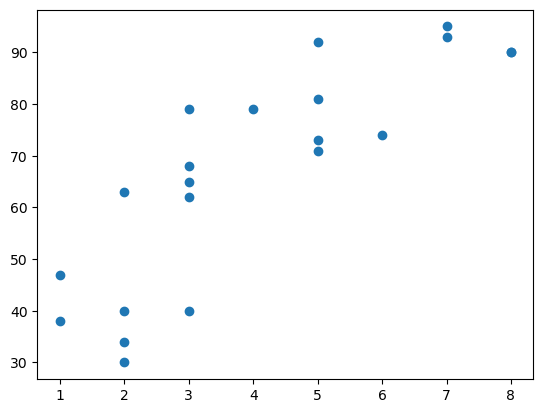

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df["hours_study"], df["score"])

In [5]:
df.corr()
#posiytive strong correlation

,hours_study,previous_marks,score
hours_study,1.000000,0.820625,0.837333
previous_marks,0.820625,1.000000,0.986067
score,0.837333,0.986067,1.000000


In [12]:

df2=pd.read_csv("E:\\datasets\\student_dataset.csv")

In [13]:
df2.head()

,StudentID,Name,Age,Gender,Grade,Attendance,FinalExamScore
0,S0001,Student1,25,Male,60.212228,85,78.652064
1,S0002,Student2,20,Male,96.532454,100,72.347071
2,S0003,Student3,24,Female,79.203509,35,88.799927
3,S0004,Student4,24,Male,65.519182,54,66.332211
4,S0005,Student5,17,Male,62.680631,53,43.787086


In [19]:
df.drop(["StudentID","Name", "Gender" ], axis=1, inplace=True)

KeyError: "['StudentID', 'Name', 'Gender'] not found in axis"

In [20]:
df2.head()

,StudentID,Name,Age,Gender,Grade,Attendance,FinalExamScore
0,S0001,Student1,25,Male,60.212228,85,78.652064
1,S0002,Student2,20,Male,96.532454,100,72.347071
2,S0003,Student3,24,Female,79.203509,35,88.799927
3,S0004,Student4,24,Male,65.519182,54,66.332211
4,S0005,Student5,17,Male,62.680631,53,43.787086


In [21]:
df2.corr()
#not well for training ML model

ValueError: could not convert string to float: 'S0001'

In [ ]:
plt.scatter(df2["Grade"], df2["FinalExamScore"])

In [22]:
df.head()

,hours_study,previous_marks,score
0,2,35,40
1,3,40,40
2,5,69,71
3,3,70,65
4,7,85,93


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
features=df[["hours_study", "previous_marks"]]
labels=df["score"]

In [25]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=0.2)

In [26]:
model=LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.score(X_test, y_test)

0.9747960531177289

In [29]:
#2nd method to check accuracy
from sklearn.metrics import accuracy_score

In [32]:
pred=model.predict(X_test) #model predictions

In [33]:
y_test #actual predictions

8     62
18    30
7     47
10    63
5     90
Name: score, dtype: int64

In [38]:
accuracy_score( y_test, pred )
#it will give error because accuracy_score work only with classification data

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [39]:
## mean squared error
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(y_test, pred)

9.926322440113674

## training logisticregression on diabetes dataset

In [41]:
data=pd.read_csv("E:\\datasets\\diabetes.csv")

In [42]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
#we do not correlation in case of classification models

In [49]:
features=data.drop(columns=["Outcome"], axis=1)

In [50]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [51]:
labels=data["Outcome"]

In [52]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=0.2)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr=LogisticRegression()

In [55]:
lr.fit(X_train, y_train)

E:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
#take user input for all 8 categories and convert it into numpy array
lr.predict([[4, 130,3,3,3,3,3,3,]])

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
#predict probabilities of bieng diabeteic or not
lr.predict_proba([[4, 130,3,3,3,3,3,3,]])

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.67138715, 0.32861285]])

In [58]:
#by default threshold value is 0.5

## take user input and make prediction

In [59]:
#make streamlit frontend

In [60]:
lr.score(X_test, y_test)

0.7987012987012987

In [ ]:
## scaler transforming? 
# NLP 
# deep learning